### Let's look at examples of run-timeness in Cppyy

In [40]:
import cppyy

Solving the issue we ran into with pybind

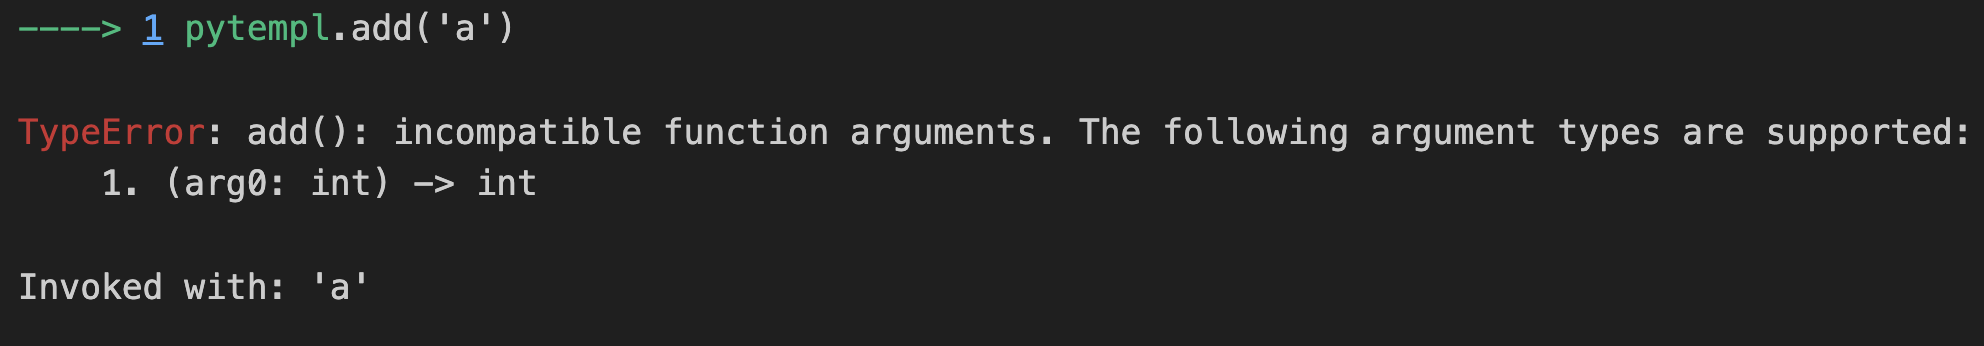

In [41]:
cppyy.cppdef('''template<class T>
T add(T x) {
    return x+x;
}''')

SyntaxError: Failed to parse the given C++ code
input_line_46:2:3: error: redefinition of 'add'
T add(T x) {
  ^
input_line_18:2:3: note: previous definition is here
T add(T x) {
  ^
 (<string>)

We can automatically call `cppyy.gbl.square` now!

In [42]:
cppyy.gbl.add(3)

6

In [43]:
cppyy.gbl.add(3.0)

6.0

In [5]:
cppyy.gbl.add('a')

b'aa'

More Runtime Template Instantiations:

In [6]:
cppyy.cppdef('''struct MyClass {
MyClass(int i) : fData(i) {}
virtual ~MyClass() {}
virtual int add(int i) {
return fData + i;
}
int fData;
};''')

True

Creating a std::vector of the C++ class

In [9]:
v = cppyy.gbl.std.vector[cppyy.gbl.MyClass]()
v

<cppyy.gbl.std.vector<MyClass> object at 0x109e96e80>

In [10]:
for i in range(10):
    v.emplace_back(i)

In [11]:
len(v)

10

In [14]:
for m in v:
    print(m.fData, end = ' ')

0 1 2 3 4 5 6 7 8 9 

In [36]:
class A():
    def __init__(self, x):
        self.x = x

In [37]:
v = cppyy.gbl.std.vector[A]()

TypeError: cannot instantiate incomplete class 'std::vector<A>'

In [38]:
class A(cppyy.gbl.MyClass):
    def __init__(self, x):
        self.x = x

In [39]:
v = cppyy.gbl.std.vector[A]()

In [21]:
class PyMyClass(cppyy.gbl.MyClass):
    def add(self, i):
        return self.fData + 2*i

In [22]:
m = PyMyClass(1)

In [25]:
m.add(1)

3